In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/boston-house-prices/housing.csv


# Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* 20.2. Load the Dataset 124
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 dollars
* PTRATIO: pupil-teacher ratio by town 12.
* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
* LSTAT: perc lower status of the population
* MEDV: Median value of owner-occupied homes in 1000 dollars
* We can see that the input attributes have a mixture of units.


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('../input/boston-house-prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [3]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# We have several variables let's first try to fit a simple linear regression model using Lstat as predictor and MEDV are response

* MEDV - (Median House Value)
* LSTAT - (Percent Of Households with low socio-econmic status)

Intuitively the higher the LSTAT the higher the MEDV (Beacuse if a considerable amount of population does not belong to a backward soci-economic backgroud , they might tend to live in costlier households)

In [5]:
X=df['LSTAT']
y=df['MEDV']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
X_train = np.array(X).reshape((len(X), 1))
y_train = np.array(y).reshape((len(y), 1))


In [8]:
reg = LinearRegression().fit(X_train, y_train)


In [9]:
print("Coefficient B1 is :" ,reg.coef_)
print("Intercept B0 is :" ,reg.intercept_)

Coefficient B1 is : [[-0.95004935]]
Intercept B0 is : [34.55384088]


# Interpreting coefficients
### ** I'll be using the notation y= B0 + B1(X)**
* Coefficient B1 is : [[-0.95004935]]

* Intercept B0 is : [34.55384088]

If the LSTAT changes by 1% (or rather 1 unit)then the median value is value of households in the area is decreasing by 0.95 units (which is as per what we assumed it to be , the no. of poor households when increase , will eventually decrease the median value of houses)

If the LSTAT is 0 then the median value is value of hosueholds in the area is 34.55 units

In [10]:
est = smf.ols('MEDV ~ LSTAT', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
LSTAT,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


**I have used df as a whole dataframe and not in terms of X_train and y_train**

In [11]:
 print(sm.OLS(y_train, X_train).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sun, 10 May 2020   Prob (F-statistic):                    2.71e-67
Time:                        16:28:03   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Interpreting t-statistics and their respective p-values


## MY INTERPRETATION OF T-Statistic - How many standard deviations are we away from the 0

                                    NULL HYPOTHESES : B1=0
                                    ALTERNATE HYPOTHESIS : B1 not = 0

**We can see that the t-statistics are sufficiently high in order to say that the B1 and B0 are significantly far away from the 0**

**Also the p - values of t-statistic are low enough (<0.05) in order to back up the fact that this has not happended by chance**

# **SO WE REJECT NULL HYPOTHESIS AND SELECT THE ALTERNATE HYPOTHESIS**

The 95% confidence interval is 

 [(B1-2*(S.E)) , (B1+2*(S.E))] and similar for the B0 

In [12]:
model_min = est.conf_int(alpha=0.05)[0]
model_max = est.conf_int(alpha=0.05)[1]

print(model_min)
print('')
print(model_max)

Intercept    33.448457
LSTAT        -1.026148
Name: 0, dtype: float64

Intercept    35.659225
LSTAT        -0.873951
Name: 1, dtype: float64


**I.e 95% of the times 1 unit change in LSTAT would change the value of MEDV by at min -> (-1.028) and at max -> (-0.873)**

# Training a Simple Linear Reg , LSTAT(X) VS MEDV(Y)

In [13]:
reg = LinearRegression().fit(X_train, y_train)

**Return the coefficient of determination R^2 of the prediction.**

R^2 -> The LSTAT is able to explain about 54% of the variability in the MEDV column

In [14]:
reg.score(X_train,y_train)

0.5441462975864797

In [15]:
reg.coef_


array([[-0.95004935]])

# What if we want to see what would be the estimation for a random instance, let's say lstat=10 . Here we got 25.05 units of MEDV , if LSTAT =10

In [16]:
X_ex=np.array([[10]])
reg.predict(X_ex)

array([[25.05334734]])

In [17]:
y_pred=reg.predict(X_train)


# PLOTTING A REGRESSION LINE THROUGH THE DATA GIVES US INSIGHT ABOUT , HOW'S THE ACTUAL DISTRIBUTION OF THE DATA AND THE BEHAVIOUR OF THE ACTUAL FUNCTION F(x) 

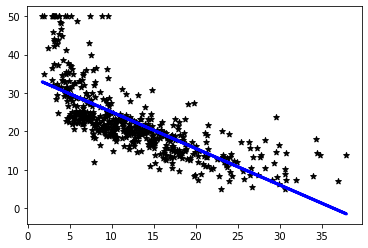

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train,  color='black',marker='*')
plt.plot(X_train, y_pred, color='blue', linewidth=3)

## # **INSIGHTS FEAT **
1. The data shows some linearity , wrt to the X
2. There not a very bad variation in the data like an outlier (but it's working abnormally at both ends (when x->0 and x->35)

# FROM THIS POINT FORWARD I'LL PREPROCESS DATA WITH RESPECT TO SOME STATISTICAL TECHNIQUES , WE'LL PROBABLY SEE A LOT OF CHANGE IN RESULTS 

# POTENTIAL PROBLEMS

* Non Linearity of theresponsible-predictor relationships
* Correlation of error terms
* Non constant variance of error terms
* Outliers
* High Leverage Points
* Colinearity


## 1) Non Linearity of data 
### Creating a residual plot , so as to reconsider our approach to observe the distribution of data

**The linear regression model assumes that there is a linear relationship b/w the predictors and the response . If the true relationship is far from linear , then all the insights that we get from data are questionable** - Gareth James


We can actually see that there is a trend that is somewhat but not perfectly linear , so let's try playing with the variable X , and see if we can get a graph , which is somewhat near to linear behaviour

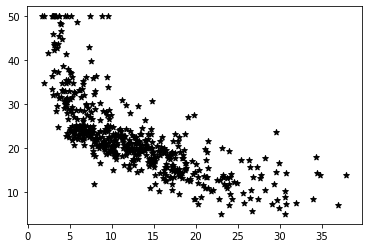

In [19]:
plt.scatter(X_train, y_train,  color='black',marker='*')

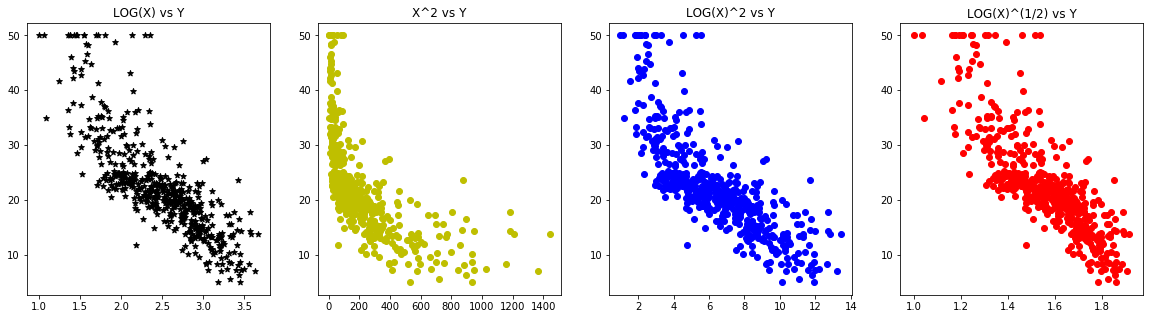

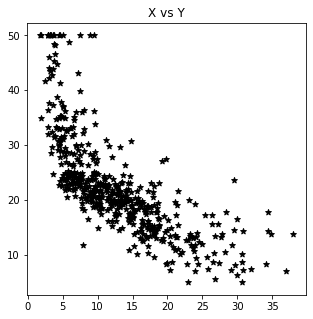

In [20]:

fig, axs = plt.subplots(1, 4)
fig.set_figheight(5)
fig.set_figwidth(20)

X_train_log = np.log(1 + X_train)
X_train_sqr=X_train**2
X_train_log_sqr=X_train_log**(2)
# let's convert X -> log(x) , so that it get's closer to the linear behaviour
axs[0].set_title('LOG(X) vs Y')
axs[1].set_title('X^2 vs Y')
axs[2].set_title('LOG(X)^2 vs Y')
axs[3].set_title('LOG(X)^(1/2) vs Y')
axs[0].scatter(X_train_log, y_train,  color='black',marker='*')
axs[1].scatter(X_train_sqr,y_train,color='y')
axs[2].scatter(X_train_log_sqr,y_train,color='b')
axs[3].scatter(X_train_log**(1/2),y_train,color='r')

fig, axs = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(20//4)
axs.set_title('X vs Y')
axs.scatter(X_train, y_train,  color='black',marker='*')

## By seeing the above 5 graphs , we come to the conclusion that graph 4  LOG(X)^(1/2) vs Y is the most linear in nature and we'll further use it to build the model

In [21]:
X_train=X_train_log**(1/2)

# 2) CORRELATION B/W ERROR  TERMS 

**The error terms are randomly distributed and show no pattern while we observe the residual plots , so we do not fix the data for anything here**

# 3) NON CONSTANT VARIANCE OF ERROR TERMS

There is one more assumption that we make while creatign linear models - "We assume the error terms have a constant variance". Going back to the same residual plot , we can rather see that , the residual vary by large and weird amounts at different intervals.

**Heteroscedasticity - If the value of the variance of the error term  (y - y^) might increase or decrease with the variation in y , such actions lead to shrinkage of evaluation of responses at the high or low ranges**

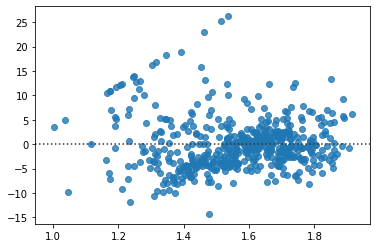

In [22]:
import seaborn as sns
sns.residplot(x=X_train,y=y_train)

# We can clearly see that the residual plot  has no shape , i.e it has linearity wrt the residuals for entire data , we could have seen a pattern if this wasn't the case . Nevertheless we'll try some other variations of the Y

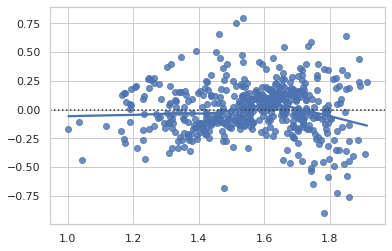

In [23]:
sns.set(style="whitegrid")

# let's see if taking the log of the output helps
y_train_log = np.log(1 + y_train)
# Plot the residuals after fitting a linear model
sns.residplot(y=y_train_log, x=X_train, lowess=True, color="b")

# It doesn't actually make data seem more linear and uncorrelated wrt to X

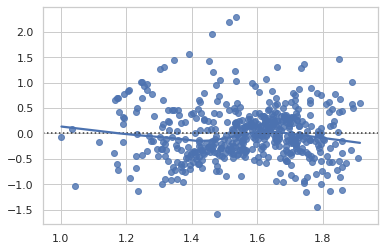

In [24]:
sns.residplot(y=y_train**(1/2),x= X_train, lowess=True, color="b")

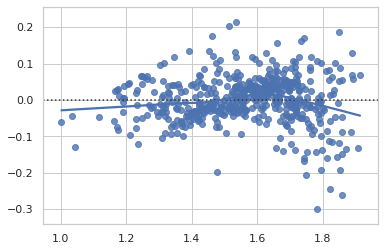

In [25]:
y_train_log = np.log(1 + y_train)
y_train_log_sqrt=y_train_log**(1/2)
sns.residplot(y=(y_train_log_sqrt), x=X_train, lowess=True, color="b")

# I tried buch of combinations , so as to reduce the effect of variance , but it does not work :(

# 4)OUTLIER DETECTION TIME :p

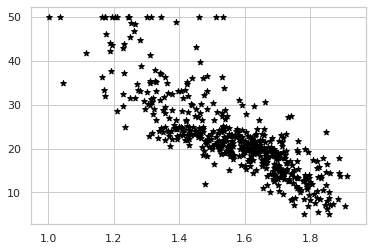

In [26]:
plt.scatter(X_train, y_train,  color='black',marker='*')

# For calculating outliers , generally we calc studentized residuals , which if >3 or <-3 , is considered an outlier

In [27]:
calc=est.outlier_test()
print(calc)

     student_resid   unadj_p  bonf(p)
0        -0.938639  0.348367      1.0
1        -0.687511  0.492078      1.0
2         0.640666  0.522031      1.0
3         0.264236  0.791706      1.0
4         1.081882  0.279823      1.0
..             ...       ...      ...
501      -0.477502  0.633212      1.0
502      -0.857915  0.391348      1.0
503      -0.853387  0.393851      1.0
504      -1.031090  0.302994      1.0
505      -2.455825  0.014393      1.0

[506 rows x 3 columns]


**So here we can see the rows where the data lies outside the acceptable permit of studentized_intervals**

**Let's remove this data**

In [28]:

list1=[]
for i in range(len(calc)):
    if calc['student_resid'].iloc[i]>3 or calc['student_resid'].iloc[i]<-3:
        list1.append(i)
df=df.drop(list1,axis=0)

In [29]:
X=df['LSTAT']
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = np.array(X).reshape((len(X), 1))
y_train = np.array(y).reshape((len(y), 1))
X_train_log = np.log(1 + X_train)
X_train=X_train_log**(1/2)
reg = LinearRegression().fit(X_train, y_train)
print("Coefficient B1 is :" ,reg.coef_)
print("Intercept B0 is :" ,reg.intercept_)

Coefficient B1 is : [[-40.12327202]]
Intercept B0 is : [84.85562456]


In [30]:
print(reg.score(X_train,y_train))

0.7041953666089009


# 5)LEVERAGE POINT DETECTION

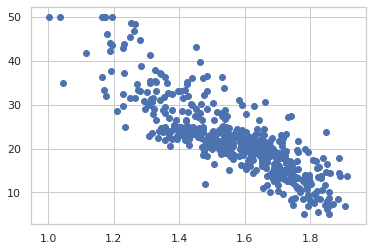

In [31]:
plt.scatter(x=X_train,y=y_train)

# We see that there are no leverage points present in this data , so for now i won't be removing anything from the dataframe , a leverage point is basically an outlier which lies on the X axis

# 6)COLINEARITY - In simple linear regression there is no other variable to consider colinearity with , so we just pass on this part as well

# NOW WE SEE HOW MUCH IMPACT HAVE OUR ACTION BROUGHT TO INITIAL OBSERVATIONS

In [32]:
X=df['LSTAT']
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = np.array(X).reshape((len(X), 1))
y_train = np.array(y).reshape((len(y), 1))
X_train_log = np.log(1 + X_train)
X_train=X_train_log**(1/2)
reg = LinearRegression().fit(X_train, y_train)
print("Coefficient B1 is :" ,reg.coef_)
print("Intercept B0 is :" ,reg.intercept_)
print(reg.score(X_train,y_train))

Coefficient B1 is : [[-40.12327202]]
Intercept B0 is : [84.85562456]
0.7041953666089009


* **WE SEE THAT THE COEFFICIENT HAS CHANGED FROM -0.95 INITIALLY TO -0.40 , ALSO THE INTERCEPT HAS CAHNGED FROM 35 TO 84 WHICH IS SIGNIFICANT CHANGE TBH, BUT WHILE TAKING INFERENCES WE MUST CONSIDER THE FACT THAT X=LOG(X)^(1/2)**
* **WE CAN ALSO SEE THAT THERE IS A LOT OF CHANGE IN THE STATISTIC OF R^2 WHICH WENT FROM 54% TO 70% , WUHUUU WE JUST INCREASED EXPLANABILITY**

# NOW WE GO AHEAD AND CALCULATE THE ACCURACY OF OUR MODEL , FROM HERE WE'LL BE MOVING TO MULTIPLE LINEAR REGRESSION AND COMPARE IT WITH THE SIMPLE LINEAR REGRESSION

In [33]:
X_test = np.array(X).reshape((len(X), 1))
y_test = np.array(y).reshape((len(y), 1))
X_test_log = np.log(1 + X_test)
X_test=X_test_log**(1/2)


In [34]:
print(reg.score(X_test,y_test))

0.7041953666089009


# The same accuracy is achieved for test set as well, which means we worked well :)

# NOW LET'S GET STARTED WITH MULTIPLE LINEAR REGRESSION

In [35]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EXPLORATORY DATA ANALYSIS

1. CRIM - Per capita crime rate in the neighbourhood

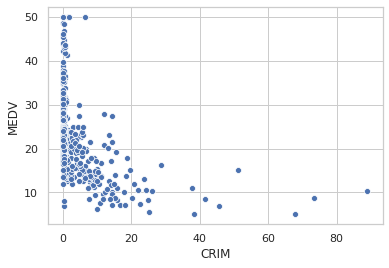

In [36]:
sns.scatterplot(x=df['CRIM'],y=df['MEDV'],data=df)

* **As one would predict the crime rate is very high from some houses where the value is very low , simplifying it we can say that  - if the neighbourhood has a low MEDV then they might/might not have per capita crime rate very very high**
* **But it doesn't really ring a bell to have a per capital crime rate of 60-80 , that might just be some leverage points that we should rather skip**
* Coefficient B1 is : CRIM -0.09262839331882253(In a multiple linear reg model ) which means that as MEDV increases by 1 unit the crime rate decreases by 9 times per capita

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

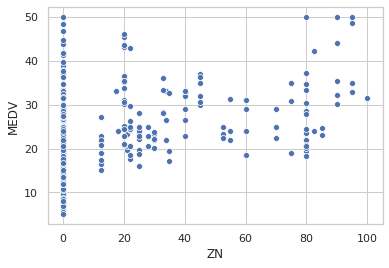

In [37]:
sns.scatterplot(x=df['ZN'],y=df['MEDV'],data=df)

* This variable probably makes no sense 
* And it might be harmful to keep it in linear model , as this variable is clearly far away from linear "

INDUS: proportion of non-retail business acres per town

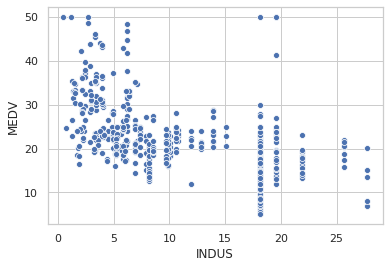

In [38]:
sns.scatterplot(x=df['INDUS'],y=df['MEDV'],data=df)

* This variable shows some beahviour and pattern which might be useful 
* So , we won't be dropping this column

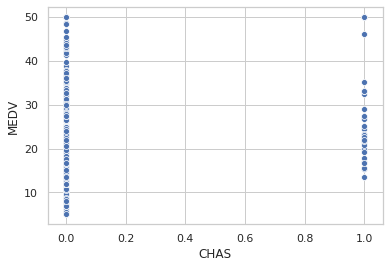

In [39]:
sns.scatterplot(x=df['CHAS'],y=df['MEDV'],data=df)

* Usually categorical variable do not come encoded in the data , but here they are finely coded 
* We'll be keeping the variable in the dataset

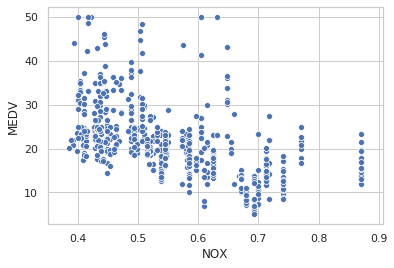

In [40]:
sns.scatterplot(x=df['NOX'],y=df['MEDV'],data=df)

* This variable also shows some useful info that we can use for further analysis
* We'll be usin the variable
* Although might try some feature scaling on the variable

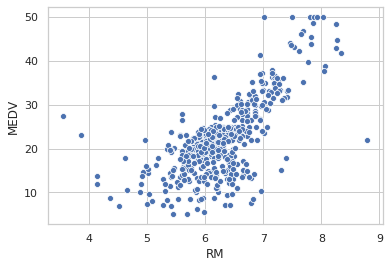

In [41]:
sns.scatterplot(x=df['RM'],y=df['MEDV'],data=df)

* Seems like a very good variable and shows linear behaviour
* So we'll probably not even require scaling for the variable

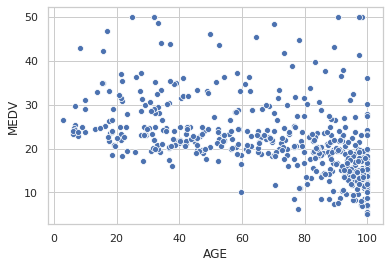

In [42]:
sns.scatterplot(x=df['AGE'],y=df['MEDV'],data=df)

* Another useful variable , we'll be keeping in the 
* Non-linear scaling could severly help the variable

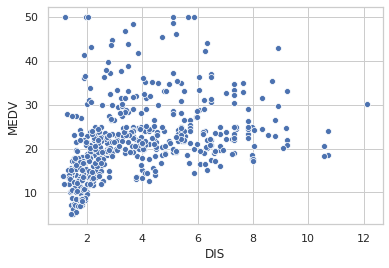

In [43]:
sns.scatterplot(x=df['DIS'],y=df['MEDV'],data=df)

* A good variable , which won't require any scaling as it's behaviour is very close to linear

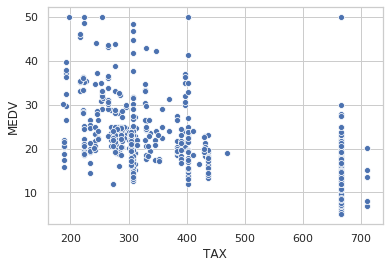

In [44]:
sns.scatterplot(x=df['TAX'],y=df['MEDV'],data=df)

* Might just code this variable to become a categorical variable  , where threshold =400

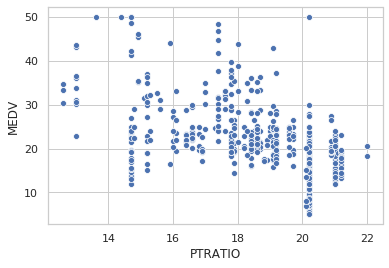

In [45]:
sns.scatterplot(x=df['PTRATIO'],y=df['MEDV'],data=df)

* Doesn't show any linear behaviour , we might just drop it

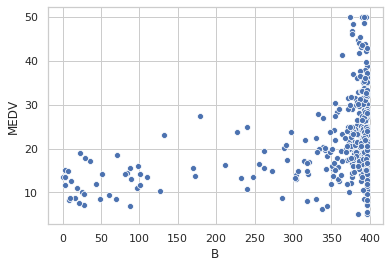

In [46]:
sns.scatterplot(x=df['B'],y=df['MEDV'],data=df)

* Doesn't look like a good variable 
* Don't know how to handle this feature tbh

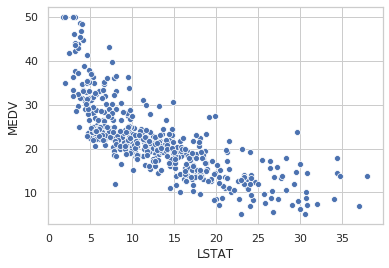

In [47]:
sns.scatterplot(x=df['LSTAT'],y=df['MEDV'],data=df)

* We encoded this variable earlier as well , certainly did a good job after scaling

# Let's train a general multiple regression model without working on the present state of the data

In [48]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
for i in range(len(X.columns)):
    print("Coefficient B1 is :" ,X.columns[i],reg.coef_[i])
    print('')
print("Intercept B0 is :" ,reg.intercept_)

Coefficient B1 is : CRIM -0.11884823861951492

Coefficient B1 is : ZN 0.03866151941220558

Coefficient B1 is : INDUS 0.045799730131116684

Coefficient B1 is : CHAS 3.045770634857212

Coefficient B1 is : NOX -13.033652336582833

Coefficient B1 is : RM 4.247278943995811

Coefficient B1 is : AGE -0.019513063756417103

Coefficient B1 is : DIS -1.2195273958783

Coefficient B1 is : RAD 0.24294944979103408

Coefficient B1 is : TAX -0.01285634885971352

Coefficient B1 is : PTRATIO -0.8504404804184338

Coefficient B1 is : B 0.010155554105550784

Coefficient B1 is : LSTAT -0.42401482363585635

Intercept B0 is : 28.379908059460046


In [49]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [50]:
y_pred=reg.predict(X_train)

# NOW LET'S CALCULATE THE RSE OF THE FIT NORMALLY WITHOUT ANY CLEANING , SCALING , INTERACTION, NON LINEAR TRANSFORMATION ETC

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')

0.19872501595159917  is the residual standard error
2.850040776952283  is the mean absolute error


In [52]:
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.7694646552704281  is  the R^2 statistic obtained for the multiple regression 


# After fitting the data using multiple linear regression , we get a R2 statistic of 77% which isn't great considering we got 70% in simple linear regression itself ,we'll work towards improving the model , from here forward.

# We'll be using Non Linear Transformations , Interaction Terms, Colinearity Detection, Outlier Removal ,Non Linearity of Data , Non Constant Variance of Error Terms etc

In [53]:
 print(sm.OLS(y_train, X_train).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              930.2
Date:                Sun, 10 May 2020   Prob (F-statistic):                   2.21e-280
Time:                        16:28:13   Log-Likelihood:                         -1124.5
No. Observations:                 396   AIC:                                      2275.
Df Residuals:                     383   BIC:                                      2327.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# We'll drop the columns where p>0.05 , indicating that there is no linear relationship bw the dropped variables and the output-

* INDUS 
* NOX
* RAD 
* TAX
* ZN


In [54]:
df=df.drop(columns=['INDUS','NOX','RAD','TAX','ZN'])

In [55]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [56]:
y_pred=reg.predict(X_train)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')

0.2117672355640762  is the residual standard error
3.039536279351315  is the mean absolute error


In [58]:
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.7435162714022011  is  the R^2 statistic obtained for the multiple regression 


# Although we dropped by 3% in our calcuation of R2 statistic , i don't mind dropping 5 columns even if there's a loss of 3%

* Introducing Interaction Terms
* Intoduction Non Transformations


# Introducing an interaction columns 

Let's try to introduce a columns which is dependant on LSTAT*AGE

In [59]:
df['LS*AGE']=df['LSTAT']*df['AGE']

In [60]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')

0.2108296369039241  is the residual standard error
2.9986473334702133  is the mean absolute error


In [61]:
 print(sm.OLS(y_train, X_train).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1315.
Date:                Sun, 10 May 2020   Prob (F-statistic):                   6.01e-284
Time:                        16:28:13   Log-Likelihood:                         -1133.0
No. Observations:                 396   AIC:                                      2284.
Df Residuals:                     387   BIC:                                      2320.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This is for columns named CRIM
This is for columns named CHAS
This is for columns named RM
This is for columns named AGE
This is for columns named DIS
This is for columns named PTRATIO
This is for columns named B
This is for columns named LSTAT
This is for columns named LS*AGE


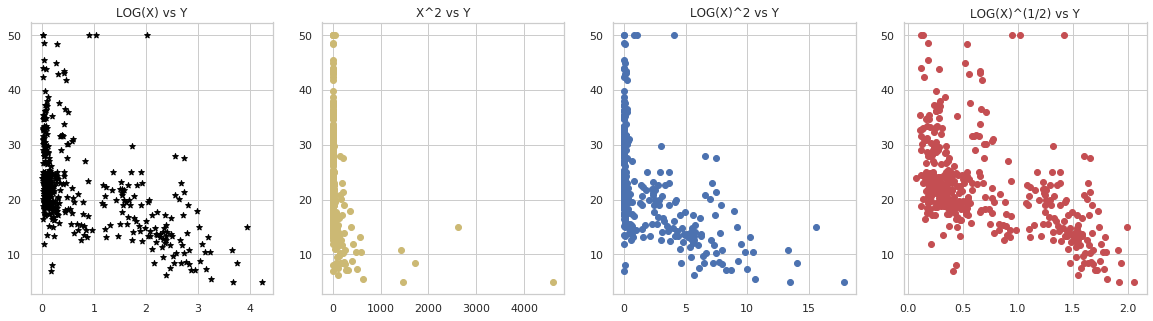

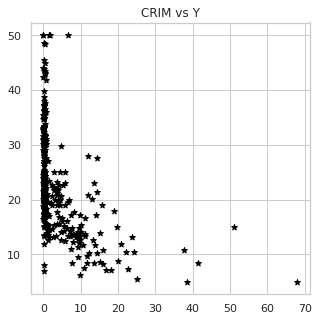

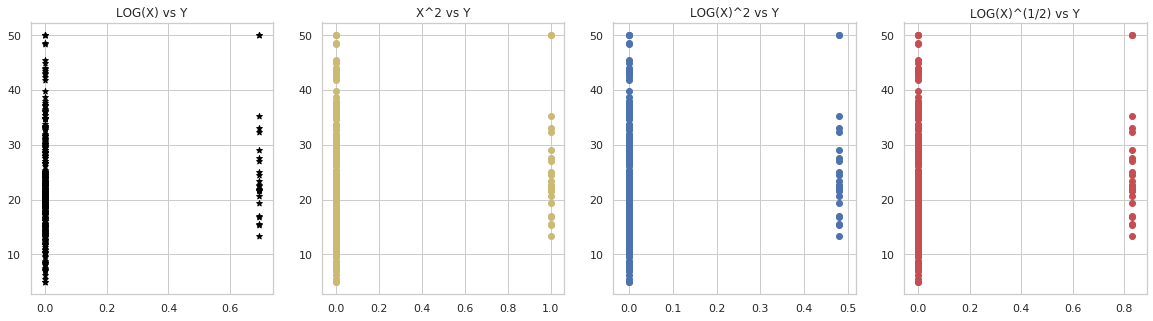

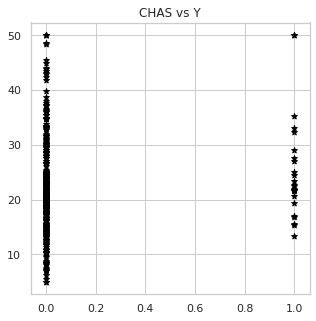

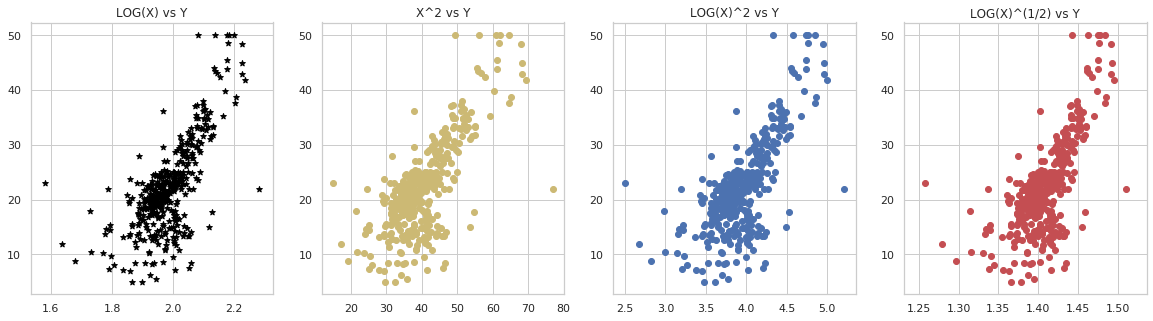

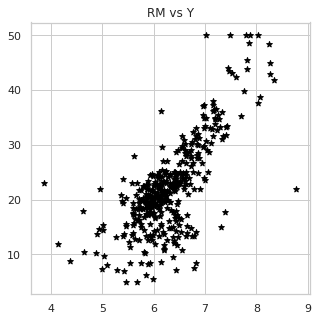

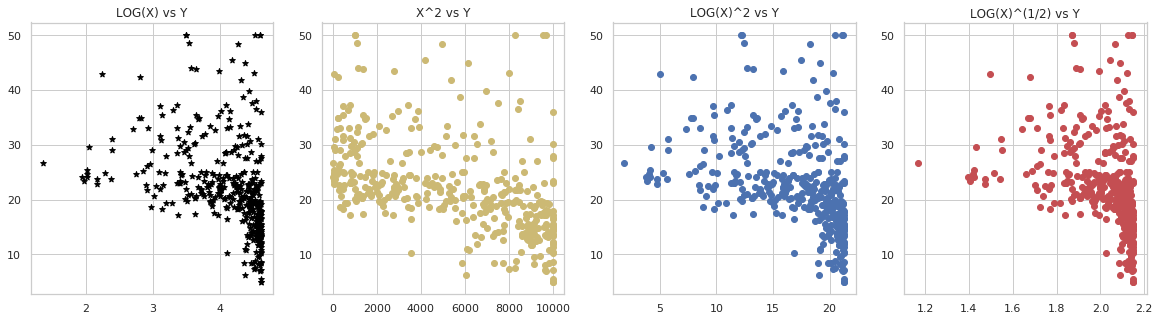

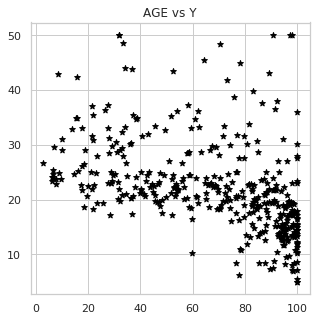

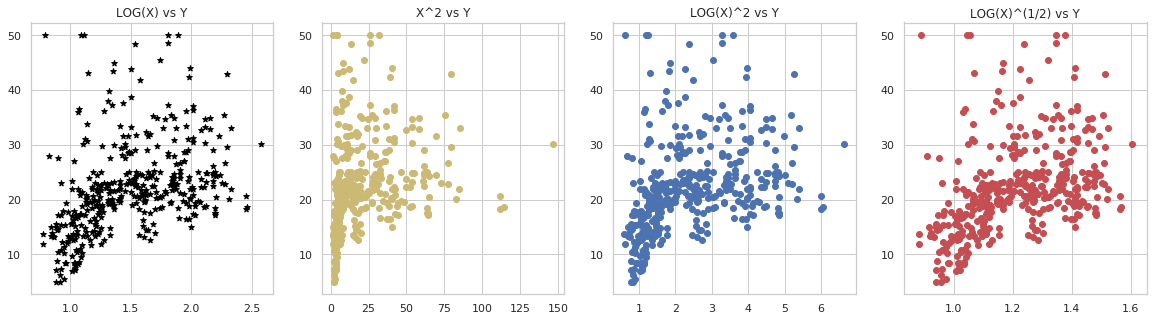

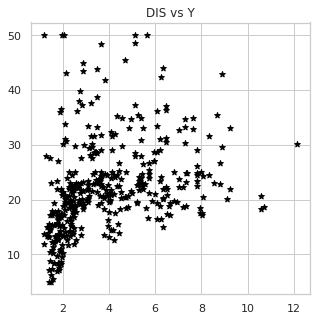

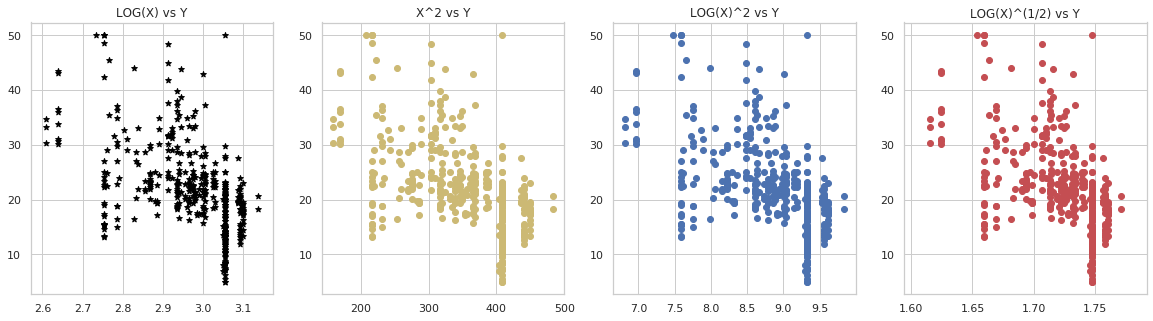

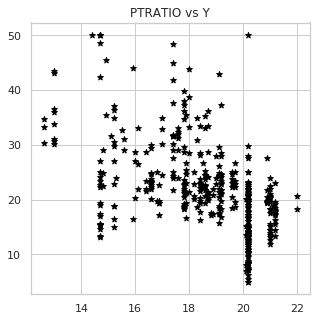

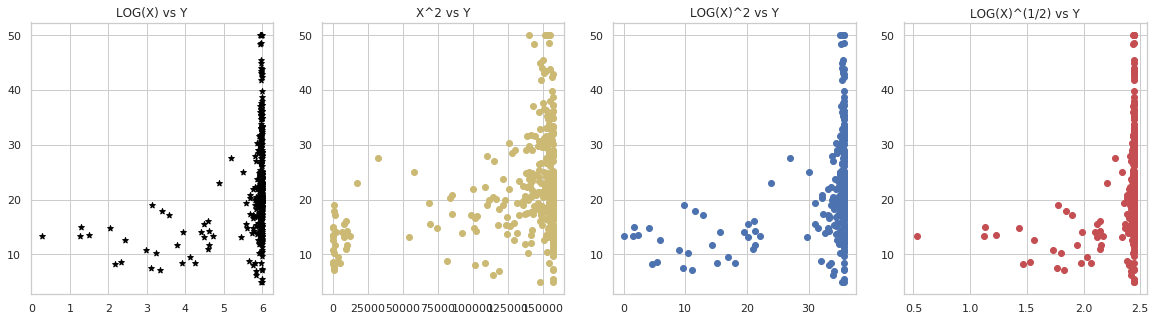

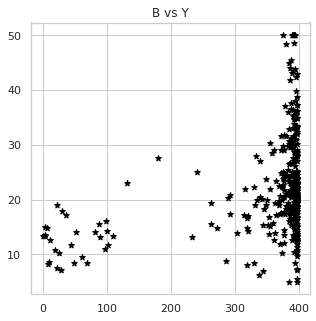

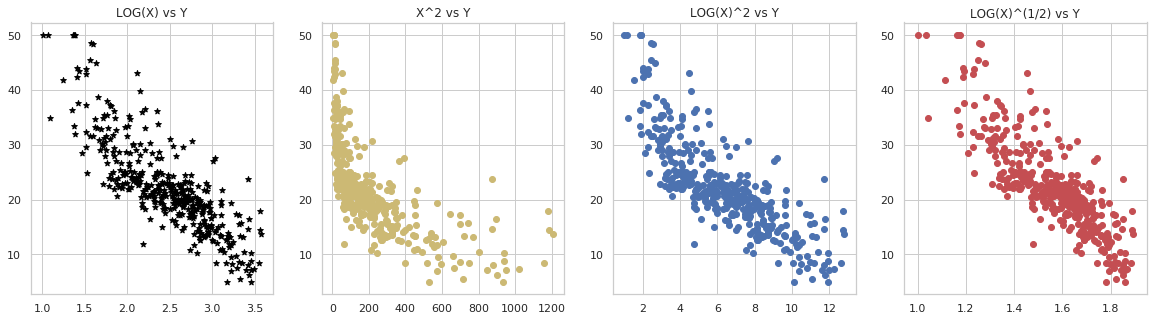

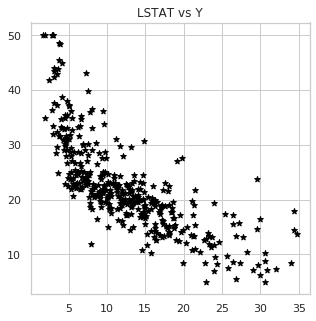

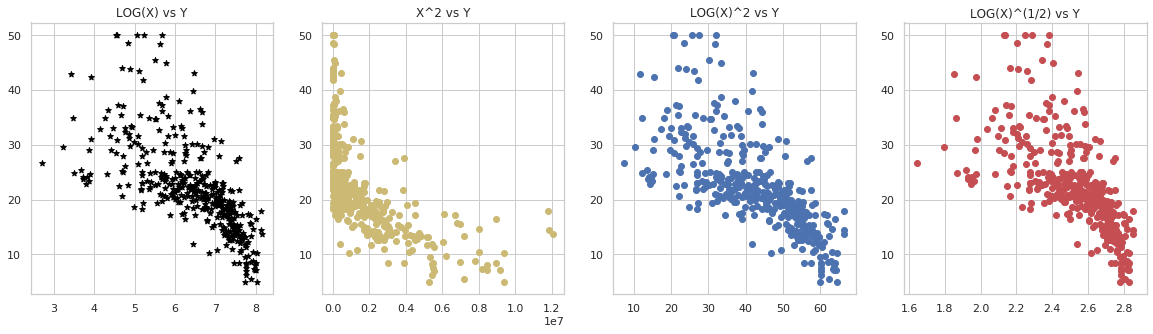

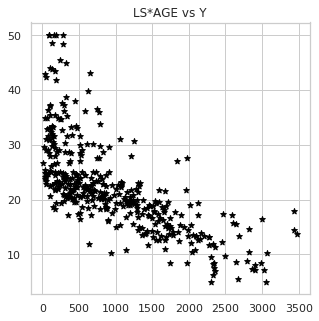

In [62]:

for col in X_train.columns:
    fig, axs = plt.subplots(1, 4)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    var_train_log = np.log(1 + X_train[str(col)])
    var_train_sqr= X_train[str(col)]**2
    var_train_log_sqr=var_train_log**(2)
    # let's convert X -> log(x) , so that it get's closer to the linear behaviour
    print('This is for columns named',col)
    axs[0].set_title('LOG(X) vs Y')
    axs[1].set_title('X^2 vs Y')
    axs[2].set_title('LOG(X)^2 vs Y')
    axs[3].set_title('LOG(X)^(1/2) vs Y')
    axs[0].scatter(var_train_log, y_train,  color='black',marker='*')
    axs[1].scatter(var_train_sqr,y_train,color='y')
    axs[2].scatter(var_train_log_sqr,y_train,color='b')
    axs[3].scatter(var_train_log**(1/2),y_train,color='r')
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(5)
    fig.set_figwidth(20//4)
    axs.set_title(str(col)+' vs Y')
    axs.scatter(X_train[str(col)], y_train,  color='black',marker='*')

# FEATURE SCALING (NON LINEAR TRANSFORMATIONS FOR -CRIM , AGE, DIS,LSTAT)

In [63]:
df['CRIM']=df['CRIM']**2
df['AGE']=(np.log(1 + df['AGE']))**(1/2)
df['DIS']=(np.log(1 + df['DIS']))**(1/2)
df['LSTAT']=(np.log(1 + df['LSTAT']))**(1/2)

In [64]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')

0.18412287917307762  is the residual standard error
2.7833914761027696  is the mean absolute error


In [65]:
y_pred=reg.predict(X_train)

In [66]:
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.8039674400815392  is  the R^2 statistic obtained for the multiple regression 


# Although the R2 statistic of the graph has increased to 80% it's going to be very hard for me to explain such tremendous mathematically scaled graphs in terms of references :) shitzz


# NON CONSTANT VARIANCE OF ERROR TERMS



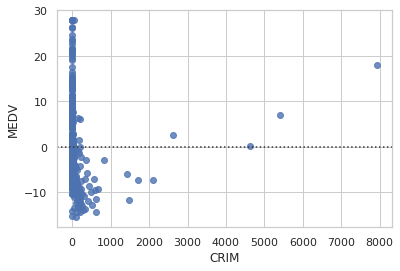

In [67]:
sns.residplot(x=X['CRIM'],y=y)

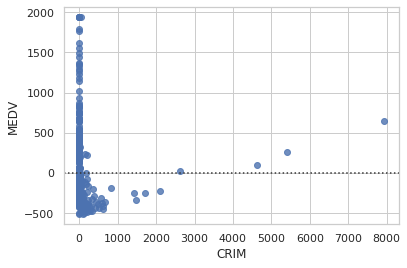

In [68]:
sns.residplot(x=X['CRIM'],y=y**2)

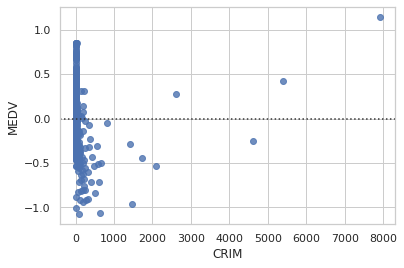

In [69]:
y_log = np.log(1 + y)
sns.residplot(x=X['CRIM'],y=y_log)

In [70]:
df.columns

Index(['CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV',
       'LS*AGE'],
      dtype='object')

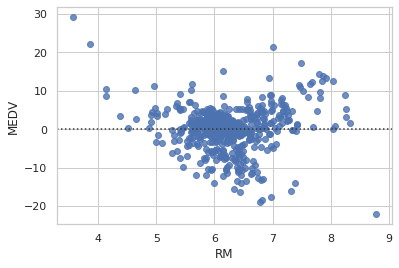

In [71]:
sns.residplot(x=X['RM'],y=y)

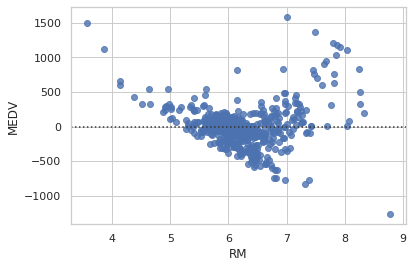

In [72]:
sns.residplot(x=X['RM'],y=y**2)

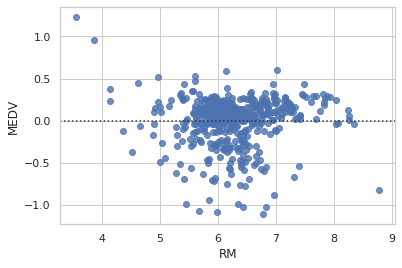

In [73]:
sns.residplot(x=X['RM'],y=y_log)

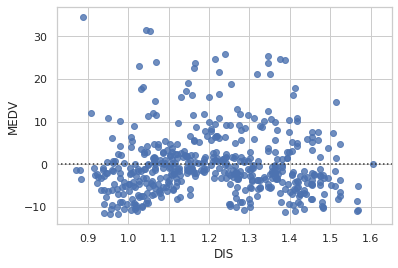

In [74]:
sns.residplot(x=X['DIS'],y=y)

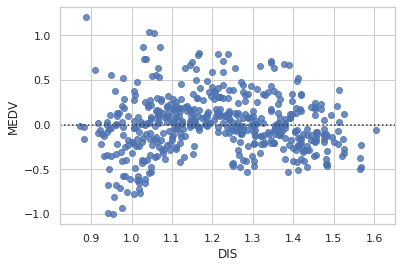

In [75]:
sns.residplot(x=X['DIS'],y=y_log)

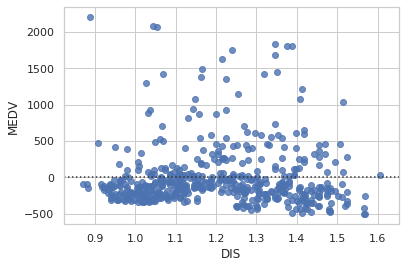

In [76]:
sns.residplot(x=X['DIS'],y=y**2)

In [77]:
est= sm.OLS(y_train, X_train).fit()
calc=est.outlier_test()
print(calc)
list1=[]
for i in range(len(calc)):
    if calc['student_resid'].iloc[i]>3 or calc['student_resid'].iloc[i]<-3:
        list1.append(i)
df=df.drop(list1,axis=0)

     student_resid   unadj_p  bonf(p)
34       -0.426107  0.670268      1.0
318      -0.236410  0.813240      1.0
358      -0.036762  0.970694      1.0
30       -0.373972  0.708631      1.0
159      -1.211703  0.226367      1.0
..             ...       ...      ...
126       0.734101  0.463333      1.0
424       0.542264  0.587950      1.0
261       2.028906  0.043154      1.0
435      -0.391947  0.695314      1.0
239      -1.040799  0.298620      1.0

[396 rows x 3 columns]


KeyError: '[371] not found in axis'

In [78]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')
y_pred=reg.predict(X_train)
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.1954726438908949  is the residual standard error
2.8870586236955154  is the mean absolute error
0.7876528371436635  is  the R^2 statistic obtained for the multiple regression 


# EXPERIMENTSSSSSSSSSS

## 1) ARE 3D PLOTS USEFUL ??


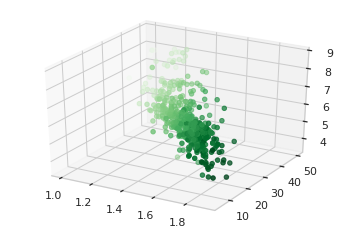

In [79]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df['LSTAT'], df['MEDV'] , df['RM']  , c=df['LSTAT'], cmap='Greens');

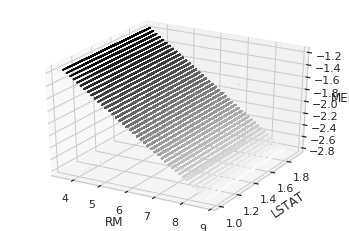

In [80]:
def f(x, y):
    return (np.array(x *-0.3226  + y *-0.0035 ))

y=df['LSTAT']
x=df['RM']

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_ylabel('LSTAT')
ax.set_xlabel('RM')
ax.set_zlabel('MEDV');

In [81]:
y_pred_test=reg.predict(X_test)

# Mean Absolute Error 
* Average of the difference between the Original Values and the Predicted Values.
* Do not gives any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data.
* Smaller the MAE, better is the model.

In [82]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_train, y_pred),'for training dataset')
print(metrics.mean_absolute_error(y_test, y_pred_test),'for test dataset')

2.8870586236955154 for training dataset
2.5305988957403853 for test dataset


# Mean Squared Error 
* Takes the average of the square of the difference between the original values and the predicted values.
* As we take square of the error, the effect of larger errors(sometimes outliers) become more pronounced then smaller error. Model will be penalized more for making predictions that differ greatly from the corresponding actual value.

In [83]:
print(metrics.mean_squared_error(y_train, y_pred),'for training daatset')
print(metrics.mean_squared_error(y_test, y_pred_test),'for test dataset')

15.054564476820465 for training daatset
11.954879401986638 for test dataset


# RMSE
* Because the MSE is squared, its units do not match that of the original output. RMSE is the square root of MSE.
* Since the MSE and RMSE both square the residual, they are similarly affected by outliers.

In [84]:
from math import sqrt
print(sqrt(metrics.mean_squared_error(y_train, y_pred)),'for training dataset')
print(sqrt(metrics.mean_squared_error(y_test, y_pred_test)),'for testing dataset')

3.8800211954086623 for training dataset
3.4575828843263667 for testing dataset


# R_squared 

In [85]:
print(metrics.r2_score(y_train, y_pred),'for training dataset')
print(metrics.r2_score(y_test, y_pred_test),'for test datset')

0.7876528371436635 for training dataset
0.8096301729223766 for test datset


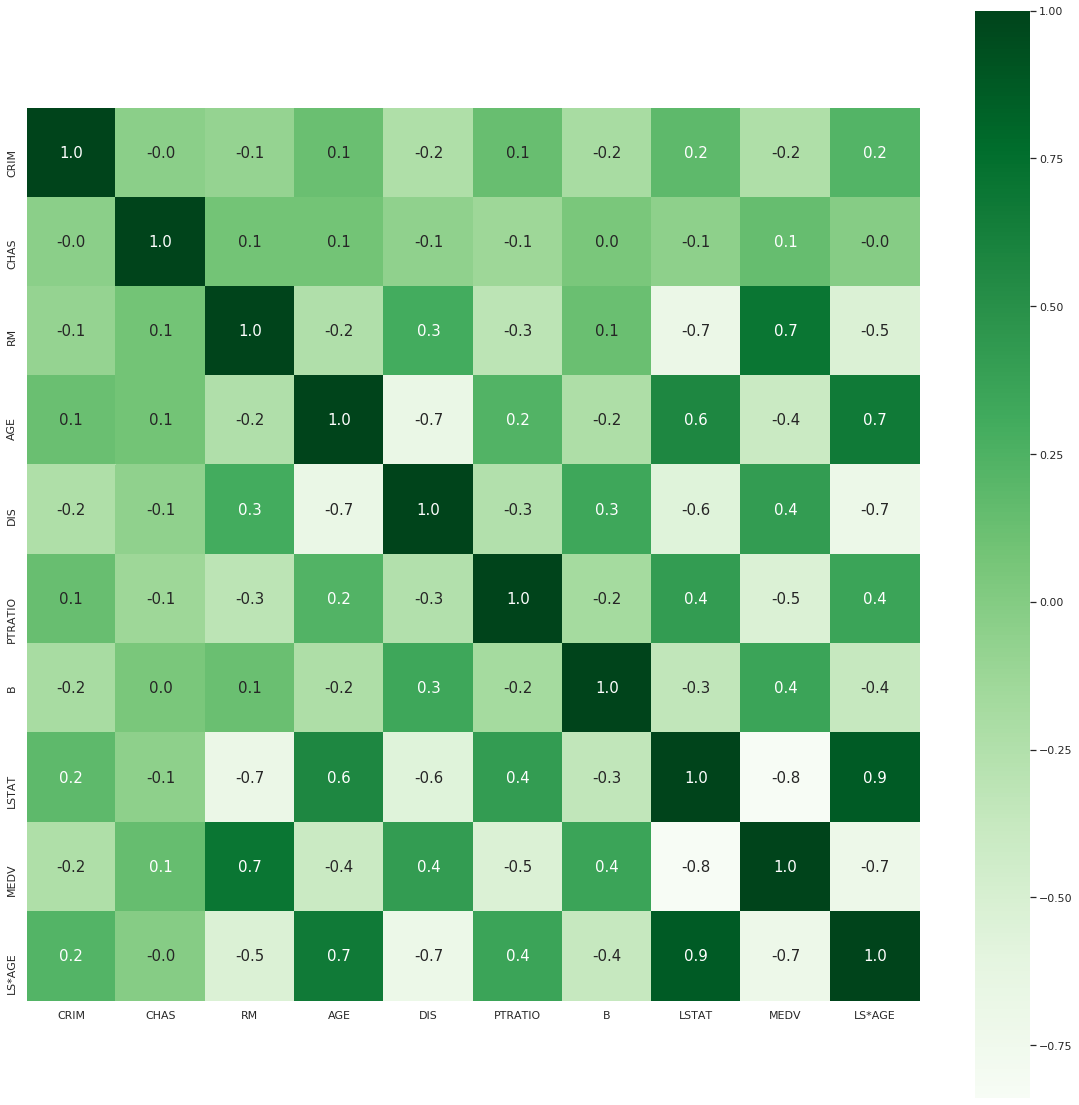

In [86]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# INTERACTION TERMS

1. **The use of interaction terms has been seen in the case of LSTAT WITH AGE , but that was a random interaction term , with no intuition behind it , we now further persue the topic in order to experiment with out regression model **

* CRIM: per capita crime rate by town
*  ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* 20.2. Load the Dataset 124
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 dollars
* PTRATIO: pupil-teacher ratio by town 12.
* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.
* LSTAT: perc lower status of the population
* MEDV: Median value of owner-occupied homes in 1000 dollars
We can see that the input attributes have a mixture of units.

INTERACTION TERM  1) The PTRATIO and DIS might have the potential to be an interaction term, as they don't have much power by themselves but together in my opinion could be stronger variables , for eg if the pupil teacher ratio is high and weighted sitance is low , then the medv values might actually be very high

In [87]:
df['New']=df['DIS']*df['PTRATIO']

In [88]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')
y_pred=reg.predict(X_train)
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.19222951732307347  is the residual standard error
2.8558423580158068  is the mean absolute error
0.7972289205316463  is  the R^2 statistic obtained for the multiple regression 


# EXPERIMENT FAILED :( - The new interaction term does not add any significant value to the present model

In [89]:
df=df.drop(columns=['New'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Removing colinear variables

In [90]:
X_train.head()

,CRIM,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,LS*AGE,New
258,0.440246,0,7.333,2.148283,1.030945,13.0,383.29,1.474318,779.000,13.402281
422,145.159123,0,5.648,2.117577,1.040294,20.2,291.55,1.647633,1235.160,21.013941
489,0.033625,0,5.414,2.144329,1.006758,20.1,344.05,1.793788,2356.251,20.235845
264,0.302577,0,7.206,2.127978,1.036840,13.0,387.89,1.486026,741.960,13.478916
329,0.004521,0,6.333,1.703356,1.351629,16.9,375.21,1.456387,126.248,22.842533


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

X_train=calculate_vif_(X_train)

dropping 'New' at index: 9
dropping 'LSTAT' at index: 7
dropping 'AGE' at index: 3
dropping 'DIS' at index: 3
dropping 'PTRATIO' at index: 3
dropping 'RM' at index: 2
Remaining variables:
Index(['CRIM', 'CHAS', 'B', 'LS*AGE'], dtype='object')


In [92]:
X_train

,CRIM,CHAS,B,LS*AGE
258,0.440246,0,383.29,779.000
422,145.159123,0,291.55,1235.160
489,0.033625,0,344.05,2356.251
264,0.302577,0,387.89,741.960
329,0.004521,0,375.21,126.248
...,...,...,...,...
7,0.020895,0,396.90,1840.315
388,205.454956,0,372.92,3062.000
283,0.000225,1,395.52,78.368
39,0.000763,0,395.63,94.176


In [93]:
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')
y_pred=reg.predict(X_train)
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.2907394333907799  is the residual standard error
4.1975728863549655  is the mean absolute error
0.5267777663502409  is  the R^2 statistic obtained for the multiple regression 


# THAT DIDNT GO VERY WELL, THE R2 STATISTIC WENT FROM 80% TO 50% ON REMOVAL OF COLINEAR VARIBALE ACCORDING TO VIF 

# EXPERIMENT FAILED :(

In [94]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_train)
num_data = X_train.shape[0]
mse = mean_squared_error(y_train,y_pred)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(y_train,y_pred)
print(rse,' is the residual standard error')
print(mae,' is the mean absolute error')
y_pred=reg.predict(X_train)
print(reg.score(X_train,y_train),' is  the R^2 statistic obtained for the multiple regression ')

0.1910694654770377  is the residual standard error
2.857289285835916  is the mean absolute error
0.782128226506565  is  the R^2 statistic obtained for the multiple regression 
